In [5]:
df_hotel_bookings<-read.csv('hotel_bookings_original.csv',header=TRUE,stringsAsFactors = FALSE)

In [6]:
df_hotel_bookings<-na.omit(df_hotel_bookings)

In [7]:
write.csv(df_hotel_bookings,'hotel_bookings_final.csv',row.names=FALSE)

Pregunta 1: i. ¿Cuántas reservas se realizan por tipo de hotel? o ¿Qué tipo de hotel prefiere la gente?

In [19]:
install.packages("ggplot2")
library(ggplot2)
install.packages("dplyr")
library(dplyr)
reservas_hotel<-table(df_hotel_bookings$hotel)
reservas_hotel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





  City Hotel Resort Hotel 
       79326        40060 

In [20]:
hotel_preferido <-df_hotel_bookings %>% group_by(hotel) %>% summarise(total =n())

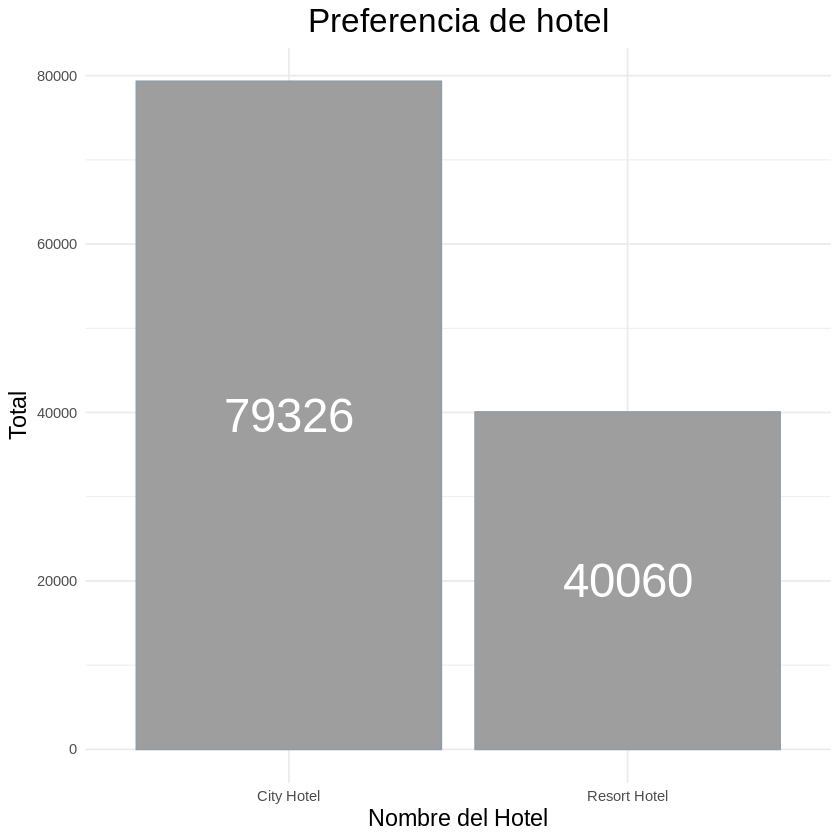

In [21]:
grafico <- ggplot(hotel_preferido, aes(x=hotel, y=total))+
  geom_bar(stat="identity", color="#8E9FAA", fill="8E9FAA")+
  geom_text(aes(label=total), position=position_stack(vjust=0.5), color="white", size=10)+
  labs(title="Preferencia de hotel", x ="Nombre del Hotel", y="Total")+
  theme_minimal()+
  theme(plot.title=element_text(hjust=0.5, size=20),
        axis.title.x=element_text(size=14),
        axis.title.y=element_text(size=14))
  print(grafico)

Pregunta 2: ii. ¿Está aumentando la demanda con el tiempo?

----



In [22]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
install.packages("ggplot2")
library(ggplot2)

# Convertir arrival_date_month a factor y reordenarlo según el orden de los meses
df_hotel_bookings <- df_hotel_bookings %>%
  mutate(arrival_date_month = factor(arrival_date_month, levels = month.name))

# Agrupar por mes, año y hotel y contar el número de reservas
reservas_por_mes <- df_hotel_bookings %>%
  group_by(arrival_date_year, arrival_date_month, hotel) %>%
  summarise(total_reservas = n())


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`summarise()` has grouped output by 'arrival_date_year', 'arrival_date_month'.
You can override using the `.groups` argument.


In [24]:
reservas_por_mes <- reservas_por_mes %>%
  mutate(arrival_date = as.Date(paste(arrival_date_year, arrival_date_month, "1"), format = "%Y %B %d"))

# Eliminar las columnas originales de año y mes si es necesario
reservas_por_mes <- reservas_por_mes %>%
  select(-arrival_date_year, -arrival_date_month)

reservas_por_mes

Adding missing grouping variables: `arrival_date_year`, `arrival_date_month`


arrival_date_year,arrival_date_month,hotel,total_reservas,arrival_date
<int>,<fct>,<chr>,<int>,<date>
2015,July,City Hotel,1398,2015-07-01
2015,July,Resort Hotel,1378,2015-07-01
2015,August,City Hotel,2476,2015-08-01
2015,August,Resort Hotel,1409,2015-08-01
2015,September,City Hotel,3529,2015-09-01
2015,September,Resort Hotel,1585,2015-09-01
2015,October,City Hotel,3386,2015-10-01
2015,October,Resort Hotel,1571,2015-10-01
2015,November,City Hotel,1235,2015-11-01


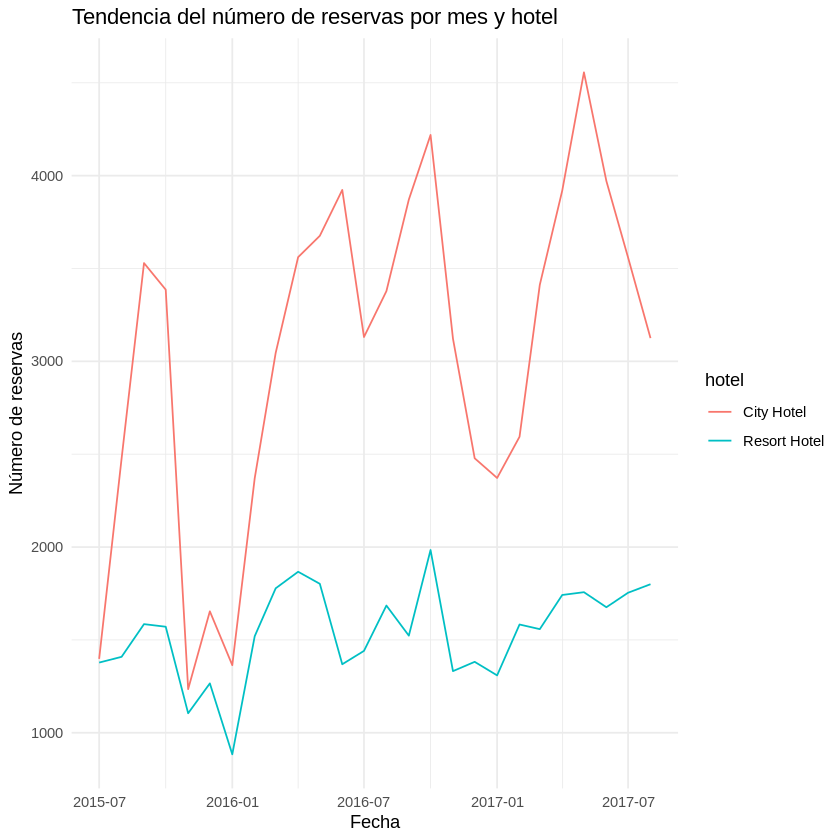

In [25]:
ggplot(reservas_por_mes, aes(x = arrival_date, y = total_reservas, color = hotel)) +
  geom_line() +
  labs(title = "Tendencia del número de reservas por mes y hotel",
       x = "Fecha",
       y = "Número de reservas") +
  theme_minimal()

Pregunta 3: iii. ¿Cuándo se producen las temporadas de reservas: alta, media y baja?

In [44]:
library(dplyr)
library(ggplot2)
library(forcats)

In [45]:
df_meses<-df_hotel_bookings %>% count(arrival_date_month)
df_meses

arrival_date_month,n
<fct>,<int>
January,5929
February,8068
March,9794
April,11089
May,11791
June,10939
July,12661
August,13873
September,10508


In [46]:
v_meses <- c(4,8,12,2,1,7,6,3,5,11,10,9)
# Asignar los nuevos nombres al data frame
df_meses$arrival_date_month <- v_meses

In [47]:
df_meses<-df_meses[order(df_meses$arrival_date_month),]
df_meses

,arrival_date_month,n
,<dbl>,<int>
5,1,11791
4,2,11089
8,3,13873
1,4,5929
9,5,10508
7,6,12661
6,7,10939
2,8,8068
12,9,6780


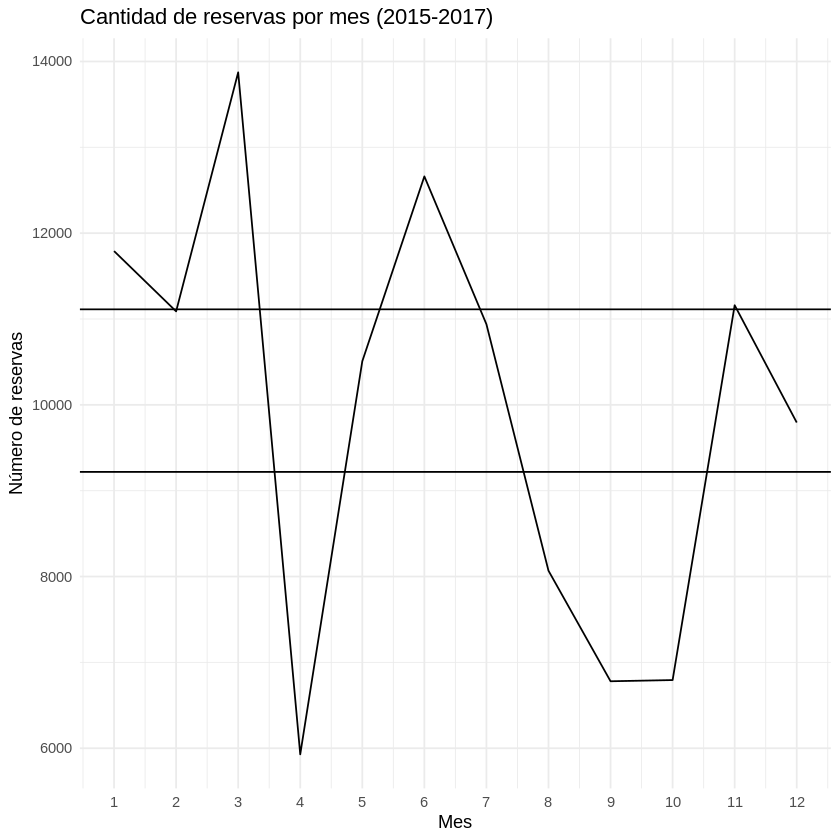

In [48]:
ggplot(df_meses, aes(x = arrival_date_month, y = n)) +
  geom_line() +
  scale_x_continuous(breaks = seq(1, 12, 1)) +
  labs(title = "Cantidad de reservas por mes (2015-2017)",
       x = "Mes",
       y = "Número de reservas") +
  geom_hline(yintercept = c(quantile(df_meses$n, 1/3), quantile(df_meses$n, 2/3)))+
  theme_minimal()

In [31]:
df_meses_2015<-df_hotel_bookings[df_hotel_bookings$arrival_date_year==2015,c("arrival_date_year","arrival_date_month")]

In [32]:
df_meses_2015 <- df_meses_2015 %>% count(arrival_date_month)
v_meses_2015 <- c(8,12,7,11,10,9)
df_meses_2015$arrival_date_month <- v_meses_2015

In [33]:
df_meses_2015<-df_meses_2015[order(df_meses_2015$arrival_date_month),]
df_meses_2015

,arrival_date_month,n
,<dbl>,<int>
3,7,5114
1,8,2776
6,9,2920
5,10,2340
4,11,4957
2,12,3885


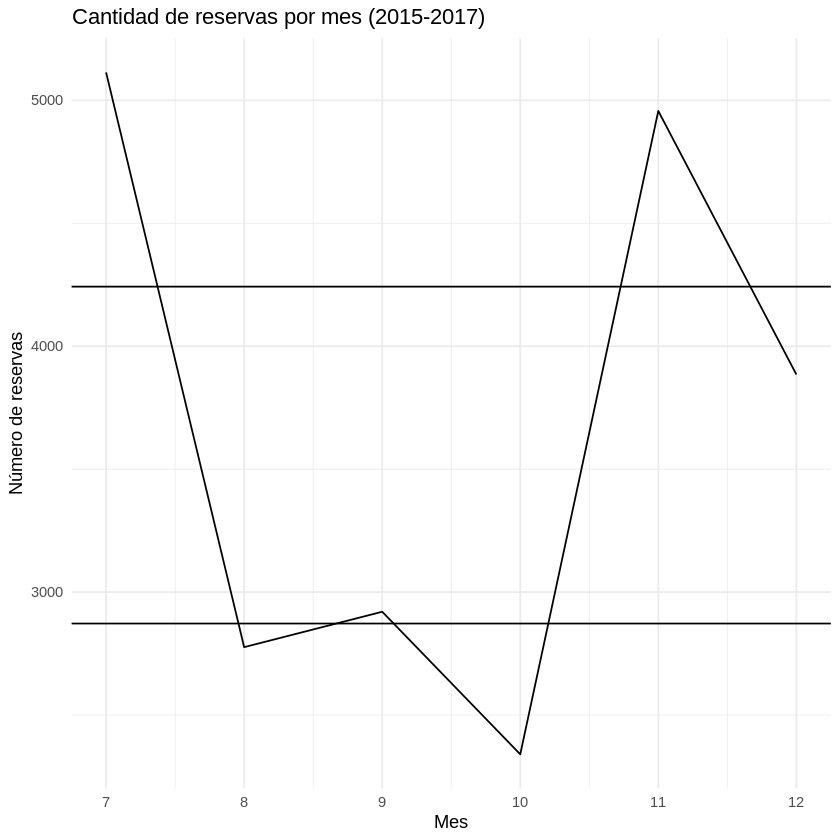

In [34]:
ggplot(df_meses_2015, aes(x = arrival_date_month, y = n)) +
  geom_line() +
  scale_x_continuous(breaks = seq(7, 12, 1)) +
  labs(title = "Cantidad de reservas por mes (2015-2017)",
       x = "Mes",
       y = "Número de reservas") +
  geom_hline(yintercept = c(quantile(df_meses_2015$n, 1/3), quantile(df_meses_2015$n, 2/3)))+
  theme_minimal()


In [35]:
df_meses_2016<-df_hotel_bookings[df_hotel_bookings$arrival_date_year==2016,c("arrival_date_year","arrival_date_month")]

In [36]:
df_meses_2016 <- df_meses_2016 %>% count(arrival_date_month)
v_meses_2016 <- c(4,8,12,2,1,7,6,3,5,11,10,9)
df_meses_2016$arrival_date_month <- v_meses_2016

In [37]:
df_meses_2016<-df_meses_2016[order(df_meses_2016$arrival_date_month),]
df_meses_2016

,arrival_date_month,n
,<dbl>,<int>
5,1,5478
4,2,5428
8,3,5063
1,4,2248
9,5,5394
7,6,4572
6,7,5292
2,8,3891
12,9,3860


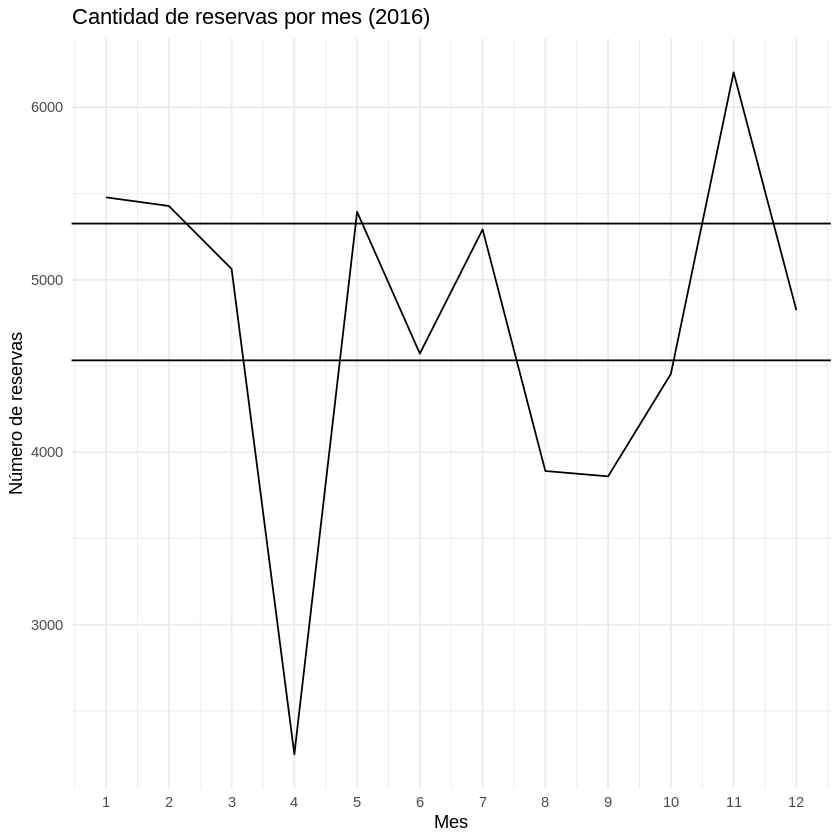

In [38]:
ggplot(df_meses_2016, aes(x = arrival_date_month, y = n)) +
  geom_line() +
  scale_x_continuous(breaks = seq(1, 12, 1)) +
  labs(title = "Cantidad de reservas por mes (2016)",
       x = "Mes",
       y = "Número de reservas") +
  geom_hline(yintercept = c(quantile(df_meses_2016$n, 1/3), quantile(df_meses_2016$n, 2/3)))+
  theme_minimal()

In [39]:
df_meses_2017<-df_hotel_bookings[df_hotel_bookings$arrival_date_year==2017,c("arrival_date_year","arrival_date_month")]
df_meses_2017 <- df_meses_2017 %>% count(arrival_date_month)

In [40]:
v_meses_2017 <- c(4,8,2,1,7,6,3,5)
df_meses_2017$arrival_date_month <- v_meses_2017

In [41]:
df_meses_2017<-df_meses_2017[order(df_meses_2017$arrival_date_month),]
df_meses_2017

,arrival_date_month,n
,<dbl>,<int>
4,1,5661
3,2,4970
7,3,5313
1,4,3681
8,5,4925
6,6,5647
5,7,6313
2,8,4177


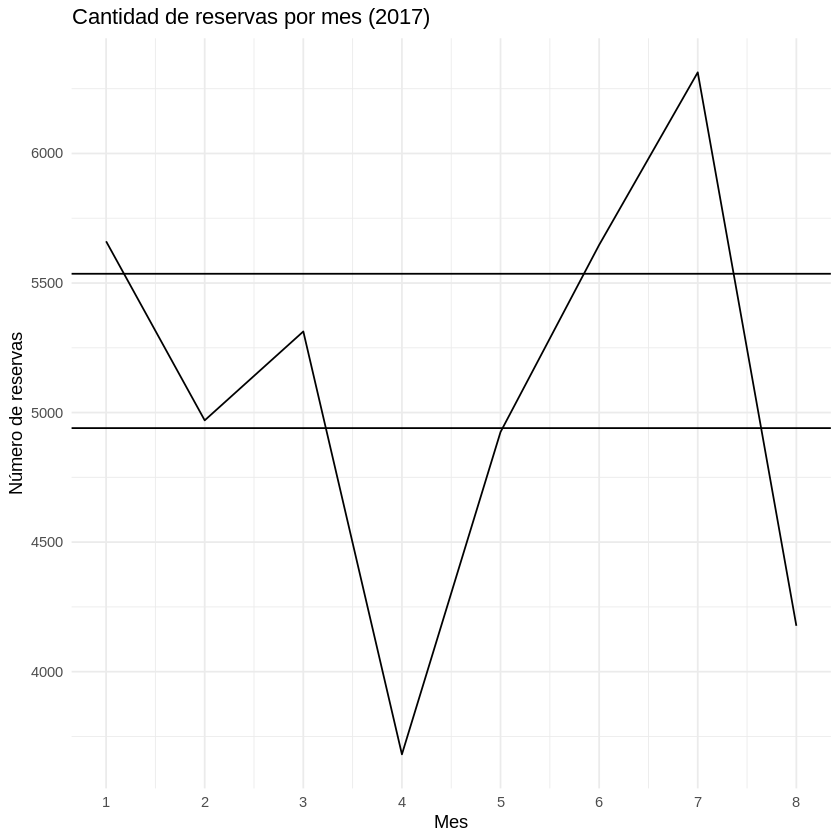

In [42]:
ggplot(df_meses_2017, aes(x = arrival_date_month, y = n)) +
  geom_line() +
  scale_x_continuous(breaks = seq(1, 8, 1)) +
  labs(title = "Cantidad de reservas por mes (2017)",
       x = "Mes",
       y = "Número de reservas") +
  geom_hline(yintercept = c(quantile(df_meses_2017$n, 1/3), quantile(df_meses_2017$n, 2/3)))+
  theme_minimal()

Pregunta 4: iv. ¿Cuándo es menor la demanda de reservas?

In [52]:
reservas_por_fecha <- df_hotel_bookings %>%group_by(arrival_date_year, arrival_date_month, arrival_date_day_of_month) %>% summarise(n = n())
summary(reservas_por_fecha)

`summarise()` has grouped output by 'arrival_date_year', 'arrival_date_month'.
You can override using the `.groups` argument.


 arrival_date_year arrival_date_month arrival_date_day_of_month       n        
 Min.   :2015      July   : 93        Min.   : 1.00             Min.   : 19.0  
 1st Qu.:2016      August : 93        1st Qu.: 8.00             1st Qu.:106.0  
 Median :2016      January: 62        Median :16.00             Median :147.0  
 Mean   :2016      March  : 62        Mean   :15.76             Mean   :150.5  
 3rd Qu.:2017      May    : 62        3rd Qu.:23.00             3rd Qu.:191.0  
 Max.   :2017      October: 62        Max.   :31.00             Max.   :448.0  
                   (Other):359                                                 

In [53]:
reservas_canceladas_por_fecha <- df_hotel_bookings %>%
  group_by(arrival_date_year, arrival_date_month, arrival_date_day_of_month) %>%
  summarise(total_reservas = n(),
           cancelaciones = sum(is_canceled == 1)
  )
head(reservas_canceladas_por_fecha)

`summarise()` has grouped output by 'arrival_date_year', 'arrival_date_month'.
You can override using the `.groups` argument.


arrival_date_year,arrival_date_month,arrival_date_day_of_month,total_reservas,cancelaciones
<int>,<fct>,<int>,<int>,<int>
2015,July,1,122,19
2015,July,2,93,57
2015,July,3,56,19
2015,July,4,88,43
2015,July,5,53,16
2015,July,6,75,34


In [55]:
fecha_menor_cancelada <- reservas_canceladas_por_fecha %>% arrange(cancelaciones)
 head(fecha_menor_cancelada)

arrival_date_year,arrival_date_month,arrival_date_day_of_month,total_reservas,cancelaciones
<int>,<fct>,<int>,<int>,<int>
2015,October,27,53,1
2016,January,11,40,1
2015,November,22,38,2
2015,December,16,43,2
2015,December,10,81,3
2015,December,12,43,3


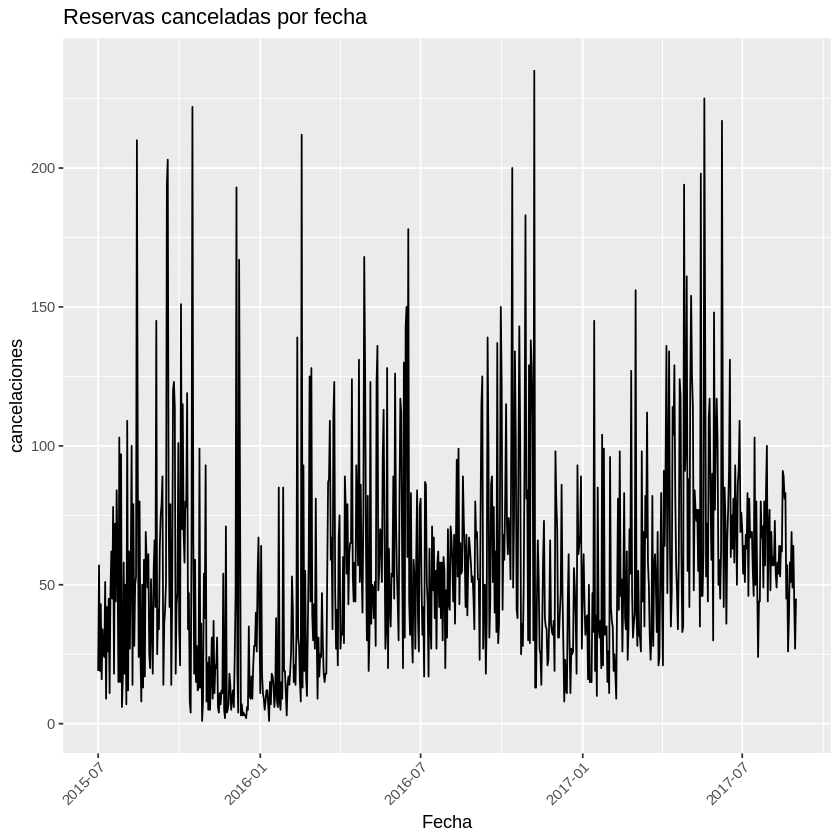

In [56]:
reservas_canceladas_por_fecha$fecha <- as.Date(paste(reservas_canceladas_por_fecha$arrival_date_year,
                                          reservas_canceladas_por_fecha$arrival_date_month,
                                          reservas_canceladas_por_fecha$arrival_date_day_of_month, sep="-"),
                                    format="%Y-%B-%d")
ggplot(data = reservas_canceladas_por_fecha, aes(x = fecha, y = cancelaciones)) +
  geom_line() +
  labs(title = "Reservas canceladas por fecha", x = "Fecha", y = "cancelaciones") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Pregunta 5: v. ¿Cuántas reservas incluyen niños y/o bebes?

In [57]:
ninios <- df_hotel_bookings %>% count(children)
bebes <- df_hotel_bookings %>% count (babies)
suma <- ninios$n + bebes$n
suma_sin_0 <- suma [-1]
print(suma_sin_0)
suma_columna <- sum(suma_sin_0)
print(suma_columna)

[1] 5761 3667   77    2
[1] 9507


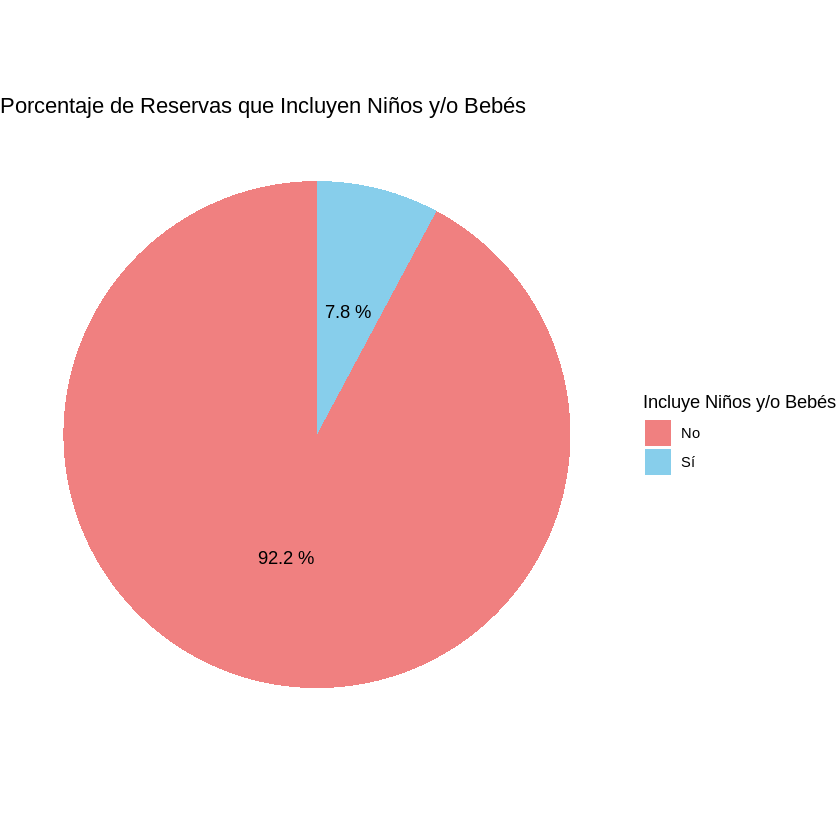

In [66]:
# Crear un dataframe con los datos
reservas_con_ninos <- df_hotel_bookings %>%
  mutate(incluye_ninos = ifelse(children > 0 | babies > 0, "Sí", "No")) %>%
  count(incluye_ninos)

# Gráfico de pie
ggplot(reservas_con_ninos, aes(x = "", y = n, fill = incluye_ninos)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Porcentaje de Reservas que Incluyen Niños y/o Bebés",
       fill = "Incluye Niños y/o Bebés",
       x = NULL, y = NULL) +
  theme_void() +
  scale_fill_manual(values = c("Sí" = "skyblue", "No" = "lightcoral")) +
  geom_text(aes(label = paste(round((n / sum(n)) * 100, 1), "%")), position = position_stack(vjust = 0.5))

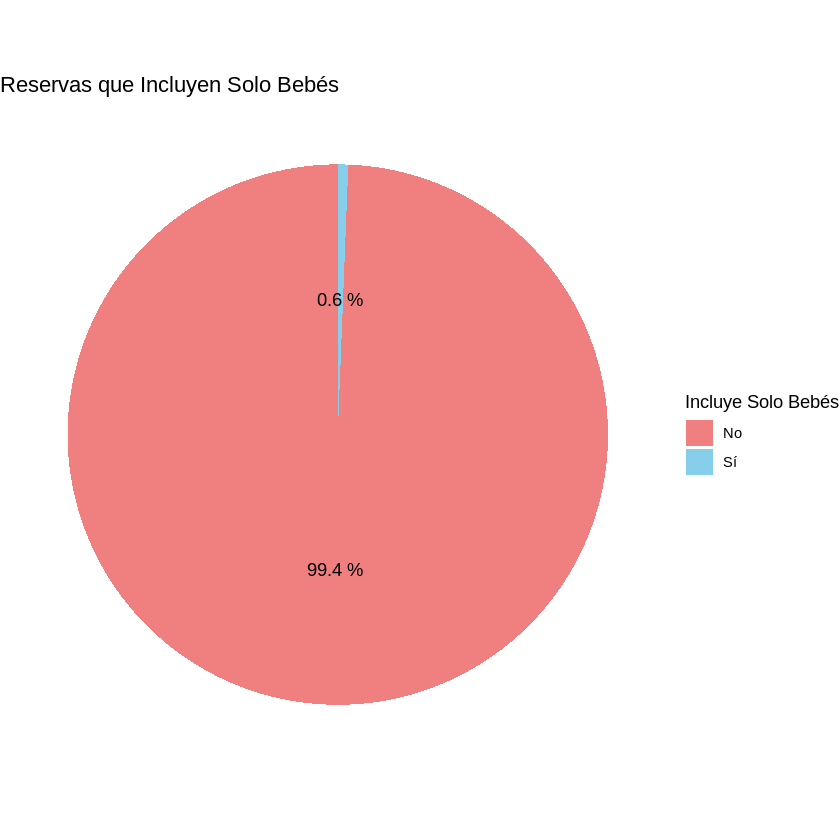

In [70]:
   Crear una nueva columna que represente si la reserva incluye solo bebés
df_hotel_bookings <- df_hotel_bookings %>%
  mutate(incluye_solo_bebes = ifelse(children == 0 & babies > 0, "Sí", "No"))

# Contar el número de reservas que incluyen solo bebés
reservas_con_solo_bebes <- df_hotel_bookings %>%
  count(incluye_solo_bebes)

# Grafico de pie del numero de reservas que incluyen solo bebés
ggplot(reservas_con_solo_bebes, aes(x = "", y = n, fill = incluye_solo_bebes)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Reservas que Incluyen Solo Bebés",
       fill = "Incluye Solo Bebés",
       x = NULL, y = NULL) +
  theme_void() +
  scale_fill_manual(values = c("Sí" = "skyblue", "No" = "lightcoral")) +
  geom_text(aes(label = paste(round((n / sum(n)) * 100, 1), "%")), position = position_stack(vjust = 0.5))


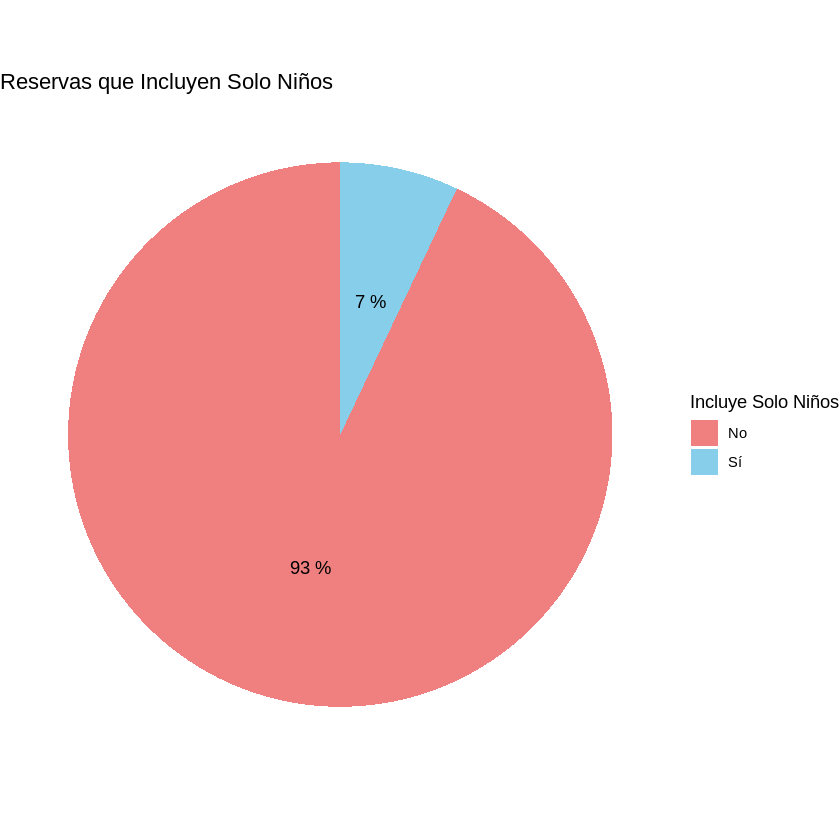

In [71]:
# Crear una nueva columna que represente si la reserva incluye solo niños
df_hotel_bookings <- df_hotel_bookings %>%
  mutate(incluye_solo_ninos = ifelse(children > 0 & babies == 0, "Sí", "No"))

# Contar el número de reservas que incluyen solo niños
reservas_con_solo_ninos <- df_hotel_bookings %>%
  count(incluye_solo_ninos)

# Grafico de pie del numero de reservas que incluyen solo niños
ggplot(reservas_con_solo_ninos, aes(x = "", y = n, fill = incluye_solo_ninos)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Reservas que Incluyen Solo Niños",
       fill = "Incluye Solo Niños",
       x = NULL, y = NULL) +
  theme_void() +
  scale_fill_manual(values = c("Sí" = "skyblue", "No" = "lightcoral")) +
  geom_text(aes(label = paste(round((n / sum(n)) * 100, 1), "%")), position = position_stack(vjust = 0.5))

Pregunta 6: vi. ¿Es importante contar con espacios de estacionamiento?

required_car_parking_spaces,n
<int>,<int>
0,67750
1,7383
2,28
3,3
8,2


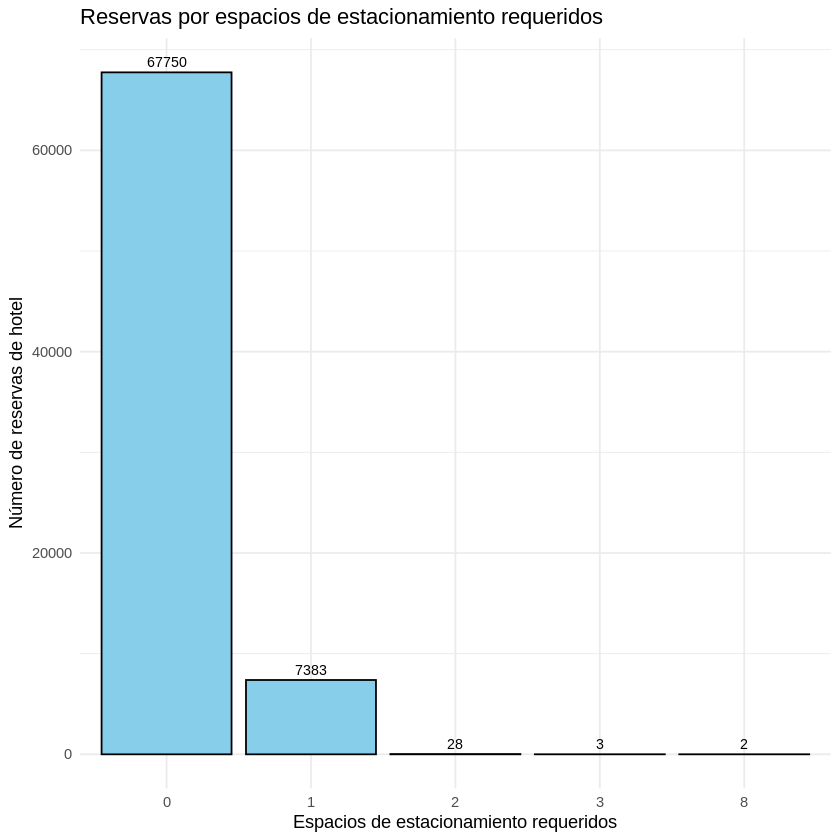

In [49]:
# Primero filtramos las reservas canceladas, ya que son irrelevantes para el análisis, luego agrupamos la cantidad de estacionamientos requeridos por el número de reservas de hotel.
estacionamiento <- df_hotel_bookings %>% filter(is_canceled != 1) %>% group_by(required_car_parking_spaces) %>% summarise(n = n())
estacionamiento
# Finalmente hacemos un gráfico de barras con etiquetas
ggplot(estacionamiento, aes(x = as.factor(required_car_parking_spaces), y = n, label = n)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(size = 3, vjust = -0.5) +
  labs(title = "Reservas por espacios de estacionamiento requeridos",
       x = "Espacios de estacionamiento requeridos",
       y = "Número de reservas de hotel") +
  theme_minimal()

Pregunta 7: vii. ¿En qué meses del año se producen más cancelaciones de reservas?

In [50]:
cancelaciones_mes <- df_hotel_bookings %>% group_by(arrival_date_month, is_canceled) %>% summarise(cancelaciones = n()) %>% filter(is_canceled == 1)
cancelaciones_por_mes <- cancelaciones_mes %>% arrange(cancelaciones)
cancelaciones_por_mes

`summarise()` has grouped output by 'arrival_date_month'. You can override
using the `.groups` argument.


arrival_date_month,is_canceled,cancelaciones
<fct>,<int>,<int>
January,1,1807
November,1,2122
December,1,2371
February,1,2696
March,1,3149
September,1,4116
October,1,4246
April,1,4524
June,1,4535


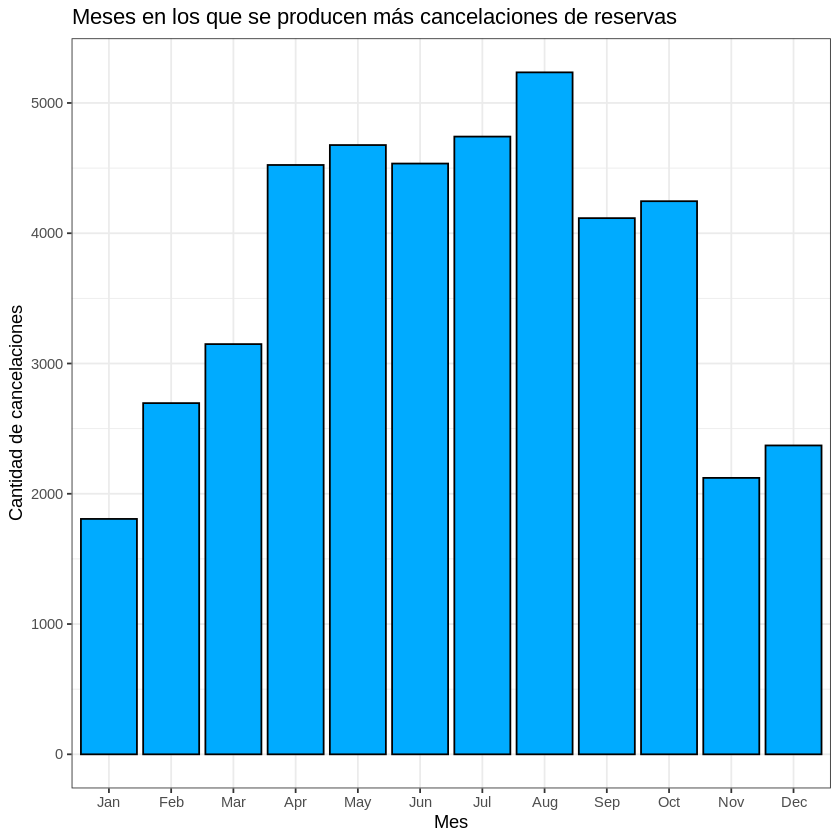

In [51]:
cancelaciones_por_mes$arrival_date_month <- factor(cancelaciones_por_mes$arrival_date_month,
                                                    levels = month.name,
                                                    ordered = TRUE)


ggplot(cancelaciones_por_mes, aes(x = arrival_date_month, y = cancelaciones)) +
  geom_col(fill = "#00abff", color = "black") +
  labs(title = "Meses en los que se producen más cancelaciones de reservas",
       x = "Mes",
       y = "Cantidad de cancelaciones") +
  theme_bw() +
  scale_x_discrete(labels = function(x) substr(x, 1, 3))


Pregunta 8: viii. ¿Cuál es el tiempo de anticipación promedio para reservas en diferentes tipos de hotel?

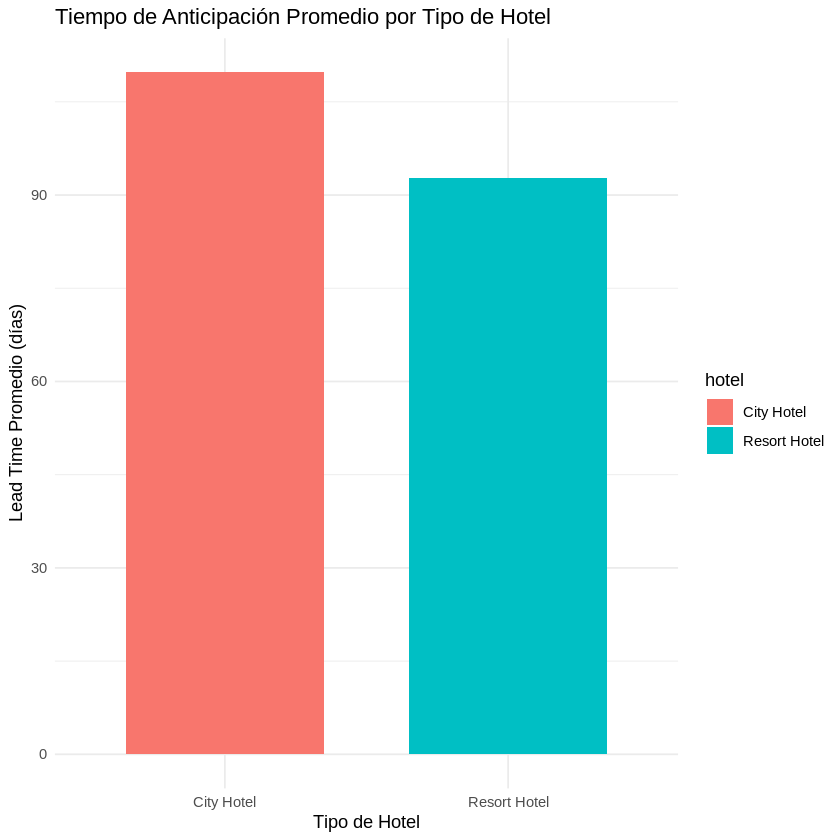

In [58]:
# Calculamos el tiempo de anticipación promedio
lead_time_avg <- df_hotel_bookings %>%
  group_by(hotel) %>%
  summarise(AverageLeadTime = mean(lead_time))

# Gráfico de barras
ggplot(lead_time_avg, aes(x = hotel, y = AverageLeadTime, fill = hotel)) +
  geom_bar(stat = "identity", width = 0.7) +
  labs(title = "Tiempo de Anticipación Promedio por Tipo de Hotel", x = "Tipo de Hotel", y = "Lead Time Promedio (días)") +
  theme_minimal()


Pregunta 9: ix. ¿Qué porcentaje de reservas son de última hora (por ejemplo, realizadas dentro de una semana antes de la fecha de llegada)?

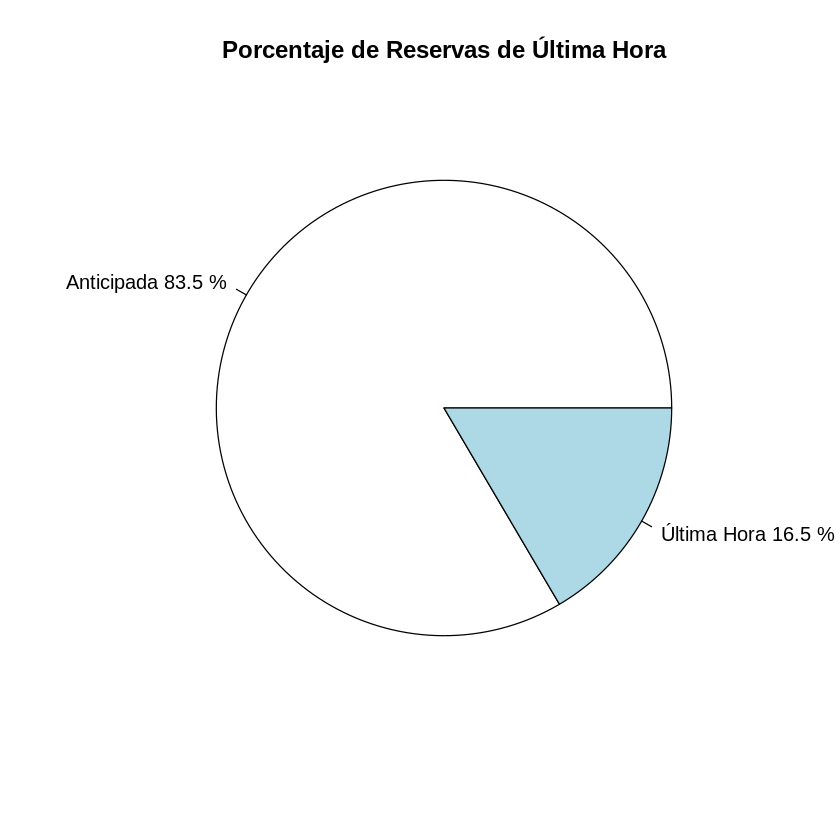

In [59]:
# Calculamos el porcentaje de reservas de última hora
last_minute_bookings <- df_hotel_bookings %>%
  mutate(LastMinute = ifelse(lead_time <= 7, "Última Hora", "Anticipada")) %>%
  group_by(LastMinute) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = Count / sum(Count) * 100)

# Gráfico de pastel
pie(last_minute_bookings$Percentage, labels = paste(last_minute_bookings$LastMinute, round(last_minute_bookings$Percentage, 1), "%"),
    main = "Porcentaje de Reservas de Última Hora")


Pregunta 10: x. ¿Cuál es la relación entre la tasa de cancelación y el tipo de cliente?

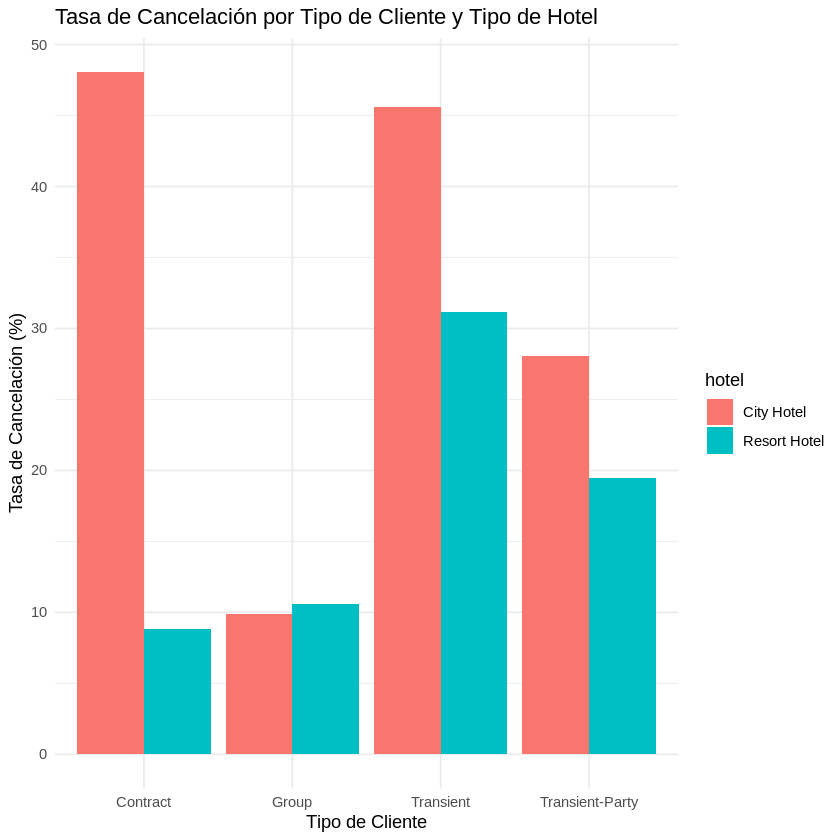

In [65]:
tasa_cancelacion <- df_hotel_bookings %>%
  group_by(hotel, customer_type) %>%
  summarise(TotalBookings = n(),
            Cancelaciones = sum(is_canceled, na.rm = TRUE),
            tasacancelacion = Cancelaciones / TotalBookings * 100, .groups = 'drop')

# Gráfico de barras
ggplot(tasa_cancelacion, aes(x = customer_type, y = tasacancelacion, fill = hotel)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Tasa de Cancelación por Tipo de Cliente y Tipo de Hotel",
       x = "Tipo de Cliente",
       y = "Tasa de Cancelación (%)") +
  theme_minimal()